### Fashion - CNN MNIST 

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision.

In [50]:
# Import TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries

import math
import numpy as np
import matplotlib.pyplot as plt

Import the dataset 

In [96]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Probable outcome classes for a given classifier

In [97]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

Exploring the datasets

In [98]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("training data count: {}".format(num_train_examples))
print("testing  data count: {}".format(num_test_examples))

training data count: 60000
testing  data count: 10000


In [99]:
def normalize(images, labels):
  print(images, labels)
  images = tf.cast(images, tf.float32)
  images /= 255    
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

Tensor("args_0:0", shape=(28, 28, 1), dtype=uint8) Tensor("args_1:0", shape=(), dtype=int64)
Tensor("args_0:0", shape=(28, 28, 1), dtype=uint8) Tensor("args_1:0", shape=(), dtype=int64)


0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot, 

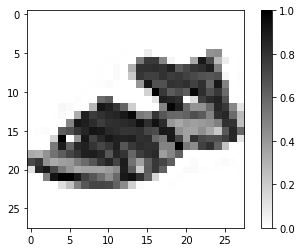

In [100]:
# Take a single image, and remove the color dimension by reshaping

# Get the number of Tensors available
for index,tensor in enumerate(class_names):
    print(index, tensor ,end=', ') 

# Printing out random samples from the data sey and visualizing 
count = 1;
import random
rand = random.randint(0,100)
for image, label in test_dataset.take(100):
    if count == rand:
        break
    count += 1        

image = image.numpy().reshape((28,28))
# print("\n", type(label))
# print(dir(label))
# print(label)

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

### Building the model

In [101]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [105]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the Model 

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))